In [1]:
import pandas as pd
import numpy as np
import ta

> Lectura de Datos desde el Excel:

In [2]:
df = pd.read_excel('GGAL_Info_Opex_DI_21_2.xlsx', sheet_name='LotesDI_21')

In [3]:
# Revisión del tipo de dato de cada columna:

df.dtypes

FECHA           datetime64[ns]
ESPECIE                 object
BASE                     int64
TIPO                    object
ÚLTIMO                 float64
%                      float64
MONTO                    int64
HORA                    object
APE.                   float64
MAX.                   float64
MIN.                   float64
C. ANT.                float64
NOMINAL                  int64
PRECIO GGAL            float64
VAR. % GGAL            float64
TLR                    float64
VI %                   float64
VE %                   float64
PARIDAD                float64
DÍAS AL VTO.             int64
PLAZO (años)           float64
dtype: object

> Ordenamiento de columnas:

In [4]:
# Eliminación de columnas que no se utilizarán:

data = df.drop(['ESPECIE', 'MONTO', 'HORA', 'C. ANT.', 'NOMINAL', 'TLR', 'DÍAS AL VTO.', 'PLAZO (años)'], axis=1).dropna()

In [5]:
data.columns

Index(['FECHA', 'BASE', 'TIPO', 'ÚLTIMO', '%', 'APE.', 'MAX.', 'MIN.',
       'PRECIO GGAL', 'VAR. % GGAL', 'VI %', 'VE %', 'PARIDAD'],
      dtype='object')

In [6]:
# Renombramiento de columnas:

old_names = data.columns
new_names = ['Fecha', 'Base', 'Tipo', 'Close', 'pct_opt', 'Open',
    'High', 'Low', 'Px_GGAL', 'pct_suby', 'VI', 'VE', 'Paridad']

data.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [7]:
# Renombramiento de columnas:

# data.rename(columns={
#     'FECHA': 'Fecha',
#     'BASE': 'Base',
#     'TIPO': 'Tipo',
#     'ÚLTIMO': 'Close',
#     '%': 'pct_opt',
#     'APE.': 'Open',
#     'MAX.': 'High',
#     'MIN.': 'Low',
#     'PRECIO GGAL': 'Px_GGAL',
#     'VAR. % GGAL': 'pct_suby',
#     'VI %': 'VI',
#     'VE %': 'VE',
#     'PARIDAD': 'Paridad'},
#     inplace=True)

In [8]:
# Cambiar a % las columnas pct y volatilidades:

data['pct_opt'] = (data['pct_opt']*100).round(2)
data['pct_suby'] = (data['pct_suby']*100).round(2)
data['VI'] = (data['VI']*100).round(2)
data['VE'] = (data['VE']*100).round(2)

> Cotizaciones Históricas de GGAL:

In [9]:
#1. Histórico Cotizaciones:
def getData(data_csv, start):
    df_hist = pd.read_csv('cotizaciones_historicas.csv')
    df_hist = df_hist.drop(['especie', 'timestamp'], axis=1)
    df_hist.set_index('fecha', inplace=True)
    df_hist.index.name = 'Date'
    df_hist.index = pd.to_datetime(df_hist.index)
    df_hist.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    df = df_hist.loc[start:,:].copy().round(2)
    return df

start = '2021-01-01'
df = getData('cotizaciones_historicas.csv', start)
df['daily_return'] = ta.others.daily_return(df['Close'])
df['volat_40'] = df['daily_return'].rolling(40).std()*np.sqrt(250)
df['volat_10'] = df['daily_return'].rolling(10).std()*np.sqrt(250)
df

,Open,High,Low,Close,Volume,daily_return,volat_40,volat_10
Date,,,,,,,,
2021-01-04,126.95,126.95,120.00,123.25,1816408,-25.071544,NaN,NaN
2021-01-05,122.75,124.75,120.50,123.65,1094595,0.324544,NaN,NaN
2021-01-06,122.80,125.90,122.40,123.05,985440,-0.485241,NaN,NaN
2021-01-07,123.10,125.25,121.55,123.90,936964,0.690776,NaN,NaN
2021-01-08,123.80,124.50,122.00,122.65,729988,-1.008878,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-02-24,200.95,205.00,196.00,204.65,2295709,-3.124260,40.138420,34.357006
2022-02-25,204.70,207.40,198.80,199.60,1613773,-2.467628,40.593594,36.022986
2022-03-02,199.00,204.00,196.00,202.85,1707644,1.628257,40.363932,35.560845


> Separar DF por tipo de Opción:

In [10]:
data_call = data.loc[data['Tipo'] == 'Call']
data_call

,Fecha,Base,Tipo,Close,pct_opt,Open,High,Low,Px_GGAL,pct_suby,VI,VE,Paridad
15,2021-10-15,129,Call,85.163,6.31,82.484,85.595,82.484,209.2,5.07,0.00,2.37,80.2
16,2021-10-15,132,Call,86.512,15.35,81.644,86.512,81.644,209.2,5.07,83.69,4.45,77.2
18,2021-10-15,140,Call,74.474,4.67,73.990,74.488,73.990,209.2,5.07,0.00,2.52,69.2
19,2021-10-15,145,Call,70.663,12.18,67.941,71.990,67.941,209.2,5.07,0.00,3.09,64.2
22,2021-10-15,160,Call,54.959,9.92,54.851,55.500,54.851,209.2,5.07,0.00,2.75,49.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,2021-12-16,220,Call,0.001,-85.71,0.001,0.001,0.001,199.1,4.27,58.22,0.00,20.9
3905,2021-12-16,230,Call,0.001,-80.00,0.001,0.001,0.001,199.1,4.27,81.97,0.00,30.9
3906,2021-12-16,240,Call,0.001,0.00,0.001,0.001,0.001,199.1,4.27,104.20,0.00,40.9
3907,2021-12-16,250,Call,0.001,0.00,0.001,0.001,0.001,199.1,4.27,125.18,0.00,50.9


In [ ]:
# Sonrisa de VI:
df_b = data_call.set_index('Base')
df_b.loc[df_b['Fecha'] == '2021-12-28', ['VI']].plot()

In [ ]:
# Agregar columna de ratio entre 2 bases (con 1 libre intermedia):

data_call['ratio_2B'] = (data_call['Close']/data_call['Close'].shift(-2)).round(2)

<AxesSubplot:>

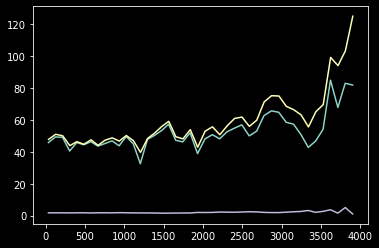

In [34]:
data_call.loc[data_call['Base'] == 230]['VI'].plot()
data_call.loc[data_call['Base'] == 250]['VI'].plot()
data_call.loc[data_call['Base'] == 230]['ratio_2B'].plot()

<AxesSubplot:>

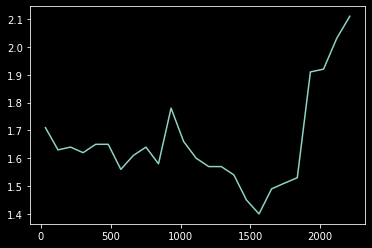

In [14]:
data_call.loc[data_call['Base'] == 220]['ratio_2B'].head(25).plot()

<AxesSubplot:>

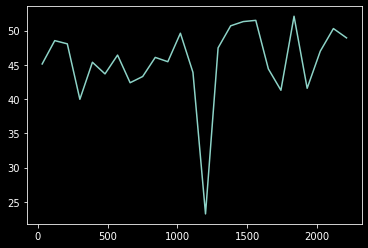

In [32]:
data_call.loc[data_call['Base'] == 220]['VI'].head(25).plot()

> Cálculo DF Opciones ATM:

In [ ]:
# Fechas únicas:

fecha_uni = set(data_call['Fecha'])
fecha_uni

In [16]:
df_call_atm = pd.DataFrame()

for fecha in fecha_uni:
    df1 = data_call.groupby(['Fecha']).get_group(fecha).nsmallest(1, 'Paridad') # Paridad --> diferencia entre Px_GGAL y Base.
    df_call_atm = df_call_atm.append(df1)

> Ordenamiento del DF 'df_call_atm':

In [17]:
# Seteo fecha como Index:

df_call_atm.set_index('Fecha', inplace=True)

In [18]:
# Ordenamiento por fecha:

df_call_atm = df_call_atm.sort_values('Fecha', ascending=True)

<AxesSubplot:xlabel='Fecha'>

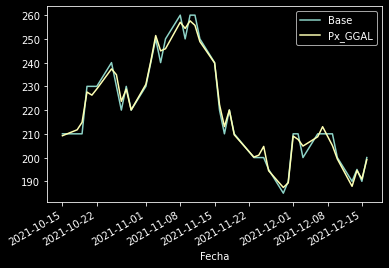

In [19]:
df_call_atm[['Base', 'Px_GGAL']].plot()

In [20]:
# Combinando el DF de los Calls ATM con la VI del Subyacente

df_call_atm = pd.merge(df_call_atm, df[['volat_40', 'volat_10']], right_index=True, left_index=True)
df_call_atm

,Base,Tipo,Close,pct_opt,Open,High,Low,Px_GGAL,pct_suby,VI,VE,Paridad,ratio_2B,volat_40,volat_10
2021-10-15,210,Call,21.628,41.46,18.000,21.800,16.700,209.20,5.07,45.29,10.34,0.80,1.70,48.443484,26.654333
2021-10-18,210,Call,23.539,8.84,21.600,26.800,19.100,211.70,1.20,48.39,10.32,1.70,1.63,48.388893,26.520340
2021-10-19,210,Call,25.093,6.60,23.700,26.300,23.000,214.85,1.49,47.26,9.42,4.85,1.60,48.152300,26.065220
2021-10-20,230,Call,19.802,26.07,17.200,20.750,15.700,227.60,5.93,40.49,8.70,2.40,1.64,49.377483,35.144083
2021-10-21,230,Call,20.278,2.40,20.450,21.940,18.000,226.30,-0.57,45.84,8.96,3.70,1.70,47.045629,35.319904
2021-10-22,230,Call,21.760,7.31,20.000,22.000,18.000,228.90,1.15,44.45,9.51,1.10,1.71,46.361442,34.994252
2021-10-25,240,Call,21.586,29.36,19.949,22.000,18.500,237.35,3.69,47.18,9.09,2.65,1.65,46.964033,35.046346
2021-10-26,230,Call,24.081,-10.82,28.500,30.800,23.900,234.90,-1.03,43.61,8.17,4.90,1.71,47.141019,37.363834
2021-10-27,220,Call,22.107,-26.94,30.000,32.500,21.760,223.70,-4.77,43.30,8.23,3.70,1.64,46.957115,49.321887
2021-10-28,230,Call,20.401,18.04,18.320,21.350,17.000,228.80,2.28,46.89,8.92,1.20,1.67,46.928755,49.529029


In [21]:
# Cálculo de las Bases ATM & OTM
media_8d = df_call_atm['Px_GGAL'].head(8).mean()
media_8d

223.85

In [22]:
bATM = df_call_atm.head(8).loc[(df_call_atm['Base'] > media_8d)]['Base'].values[0]

In [23]:
bases = list(set(data_call['Base']))


In [24]:
bases.sort()
#print(bases)
indexATM = bases.index(230)
bOTM = bases[indexATM+2]
bOTM

250

<AxesSubplot:>

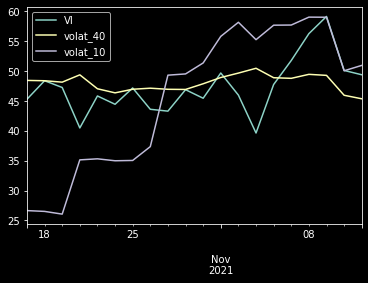

In [25]:
df_call_atm.loc[:,['VI', 'volat_40', 'volat_10']].head(20).plot()

In [26]:
# Valores mínimo. máximo y medio del OpEx:

df_call_atm['Px_GGAL'].min(), df_call_atm['Px_GGAL'].max(), df_call_atm['Px_GGAL'].mean().round(2)

(187.4, 257.6, 219.83)

(209.2, 237.35, 224.33)

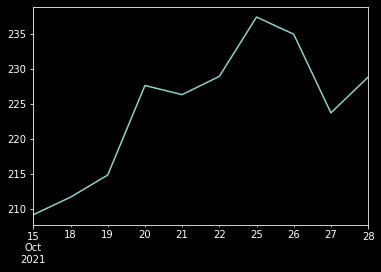

In [27]:
# Valores mínimo, máximo, medio y gráfico del PxClose de los primeros 10 días del OpEx:

df_call_atm['Px_GGAL'].head(10).plot()
df_call_atm['Px_GGAL'].head(10).min(), df_call_atm['Px_GGAL'].head(10).max(), df_call_atm['Px_GGAL'].head(10).mean().round(2)

In [28]:
# Precios de las bases ATM y OTM para armar Ratio en una fecha específica:

date = '2021-10-21'
b_atm = 230
b_otm = 250

Pb_atm = data_call[(data_call['Fecha'] == date) & (data_call['Base'] == b_atm)]['Close'].values[0]
Pb_otm = data_call[(data_call['Fecha'] == date) & (data_call['Base'] == b_otm)]['Close'].values[0]

Pb_atm, Pb_otm

(20.278, 11.944)

In [29]:
import math

pxHoy = 210
qty_atm = 100


In [30]:
def get_ratio(pxHoy, b_atm, b_otm, Pb_atm, Pb_otm, qty_atm):
    paso = 3
    lista_1 = [i for i in range(math.floor(0.85*pxHoy), pxHoy, paso)]
    lista_2 = [i for i in range(pxHoy, math.floor(1.4*pxHoy), paso)]

    df_finish = pd.DataFrame([lista_1 + lista_2]).T
    df_finish.columns = ['Px_Finish']

    dif_P = 2*Pb_otm - Pb_atm # diferencia de primas
    dif_B = b_otm - b_atm # diferencia de bases

    PnL = {
        'under_atm':round(dif_P*100*qty_atm, 2),
        'max_profit':round((dif_P + dif_B)*100*qty_atm, 2),
        'break_even':round(dif_P + 2*b_otm - b_atm, 2)
        }

    conditions = [
        (df_finish['Px_Finish'] < b_atm),
        (df_finish['Px_Finish'] >= b_atm) & (df_finish['Px_Finish'] < b_otm),
        (df_finish['Px_Finish'] == b_otm),
        (df_finish['Px_Finish'] > b_otm),
    ]

    values = [
        dif_P*qty_atm*100,
        (df_finish['Px_Finish'] + dif_P - b_atm)*100*qty_atm,
        (dif_P + dif_B)*100*qty_atm,
        (-df_finish['Px_Finish'] + dif_P + 2*b_otm - b_atm)*100*qty_atm
    ]
    
    df_finish['Result'] = np.select(conditions, values)
    return [PnL, df_finish.set_index('Px_Finish').Result]

In [ ]:
a = pd.DataFrame(get_ratio(pxHoy, b_atm, b_otm, Pb_atm, Pb_otm, qty_atm)[1])
a['Result']

In [36]:
def get_bases(df1, df2, date, n=8):
    '''Retorna el par de bases ATM y OTM con sus precios, en función
    del Px_Suby medio de los primeros n días del OpEx.
    df1: return base_ATM().
    df2: return call_put().
    n: int, días desde iniciaco el OpEx.'''
    # Cálculo de las Bases ATM & OTM
    px_medio = df1['Px_GGAL'].head(n).mean()

    b_atm = df1.head(n).loc[(df1['Base'] > px_medio)]['Base'].values[0]

    bases_full = list(set(df1['Base']))
    bases_full.sort()
    indexATM = bases_full.index(230)
    b_otm = bases_full[indexATM + 2]

    px_atm = df2[(df2['Fecha'] == date) & (df2['Base'] == b_atm)]['Close'].values[0]
    px_otm = df2[(df2['Fecha'] == date) & (df2['Base'] == b_otm)]['Close'].values[0]

    bases = {'Base_ATM': b_atm,
        'Px_ATM': px_atm,
        'Base_OTM': b_otm,
        'Px_OTM': px_otm}

    return bases

In [37]:
# Info de las bases ATM y OTM (base y precio):

bases = get_bases(df_call_atm, data_call, '2021-10-21')
bases

{'Base_ATM': 230, 'Px_ATM': 20.278, 'Base_OTM': 250, 'Px_OTM': 11.944}

In [ ]:
list_px_atm = []
list_px_otm = []
index = list(set(data_call['Fecha']))
index.sort()

for i in index:
    px_atm = get_bases(df_call_atm, data_call, i)['Px_ATM']
    px_otm = get_bases(df_call_atm, data_call, i)['Px_OTM']

    list_px_atm.append(px_atm)
    list_px_otm.append(px_otm)



In [74]:
PnL = pd.DataFrame([list_px_atm, list_px_otm]).T

In [75]:
PnL.set_index(df_call_atm.index, inplace=True)

In [76]:
PnL.columns = ['Px_ATM', 'Px_OTM']

In [ ]:
PnL

In [49]:
# Cobro al armar el ratio:

credit_ratio = round(2*list_px_otm[4] - list_px_atm[4], 2)
credit_ratio

3.61

In [52]:
list_px_otm[4]

11.944

<AxesSubplot:>

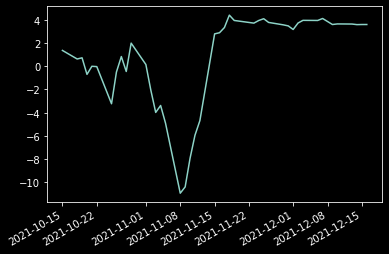

In [81]:
PnL['Day_result'] = round(credit_ratio + (PnL['Px_ATM'] - 2*PnL['Px_OTM']), 2)
PnL['Day_result'].plot()

In [82]:
PnL

,Px_ATM,Px_OTM,Result_day,Day_result
2021-10-15,12.705,7.472,1.371000e+00,1.37
2021-10-18,14.446,8.715,6.260000e-01,0.63
2021-10-19,15.707,9.295,7.270000e-01,0.73
2021-10-20,19.802,12.058,-7.040000e-01,-0.70
2021-10-21,20.278,11.944,-3.108624e-15,-0.00
2021-10-22,21.760,12.698,-2.600000e-02,-0.03
2021-10-25,27.002,16.926,-3.240000e+00,-3.24
2021-10-26,24.081,14.096,-5.010000e-01,-0.50
2021-10-27,17.283,10.028,8.370000e-01,0.84
2021-10-28,20.401,12.231,-4.510000e-01,-0.45
